In [2]:
import os
# 2x 2 chips (4 cores) per process:
os.environ["TPU_CHIPS_PER_HOST_BOUNDS"] = "1,2,1"
os.environ["TPU_HOST_BOUNDS"] = "1,1,1"
# Different per process:
os.environ["TPU_VISIBLE_DEVICES"] = "0,1" # Change to "2,3" for the second machine
# Pick a unique port per process
os.environ["TPU_MESH_CONTROLLER_ADDRESS"] = "localhost:8476"
os.environ["TPU_MESH_CONTROLLER_PORT"] = "8476"

print('done')

done


In [3]:
import jax
print(jax.devices())

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0), TpuDevice(id=1, process_index=0, coords=(0,0,0), core_on_chip=1), TpuDevice(id=2, process_index=0, coords=(0,1,0), core_on_chip=0), TpuDevice(id=3, process_index=0, coords=(0,1,0), core_on_chip=1)]


In [4]:
%cd ~/base/project1/github

/mnt/disks/persist/project1/github


In [5]:
!pwd

/mnt/disks/persist/project1/github


In [9]:
%cd pyprobml/scripts

/mnt/disks/persist/project1/github/pyprobml/scripts


L2-filter: 3.2605
L2-smooth: 2.0507


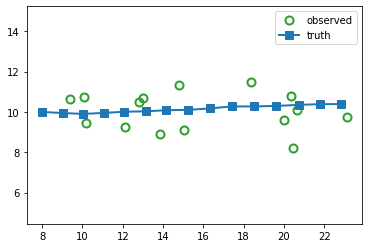

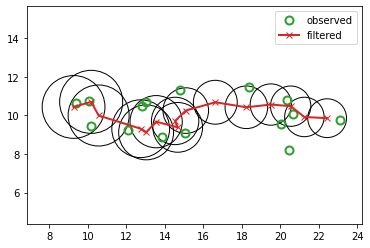

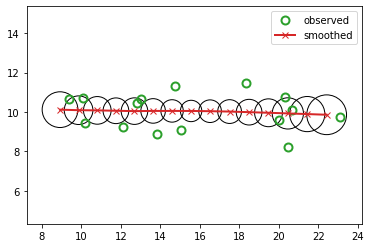

In [10]:
%run kf_tracking_demo.py